In [22]:
from tensorflow.keras.models import load_model
from src.data import Data
import pandas as pd
import matplotlib.pyplot as plt 

In [92]:
IMAGE_SIZE = (128, 128)

class_info = "../data/class_info.csv"

df = pd.read_csv(class_info)
df.index = df["name"]
class_dict= df[["r", "g", "b"]].transpose().to_dict()

valid_root = "../data/verification_dataset/"

valid_data = Data(image_dir=valid_root + "images/",
                mask_dir=valid_root + "masks/",
                class_dict=class_dict)

X_valid, y_valid = valid_data.get_batch(batch_size=4, size=IMAGE_SIZE)

train_root = "../data/training_dataset/"

train_data = Data(image_dir=train_root + "images/",
                mask_dir=train_root + "masks/",
                class_dict=class_dict)

X_train, y_train = train_data.get_batch(batch_size=32, size=IMAGE_SIZE)

Number of images: 420
Number of labels: 420
X shape: (4, 128, 128, 3)
y shape: (4, 128, 128, 3)
Number of images: 766
Number of labels: 766
X shape: (32, 128, 128, 3)
y shape: (32, 128, 128, 3)


In [50]:
model = load_model("../experiments/study-00/model")

In [93]:
probs = model.predict(X_train)

1/1 [==============================] - 16s 16s/step


In [94]:
import numpy as np
y_pred = np.argmax(probs, axis=-1)

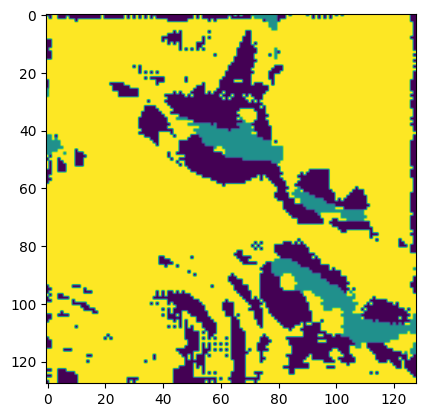

In [95]:
plt.imshow(y_pred[1,:,:])

In [47]:
probs.shape, y_pred.shape[1:]

((4, 64, 64, 3), (64, 64))

In [48]:
X_valid.shape[1:]

(64, 64, 3)

In [33]:
(y_pred[:,:,:] == 0).astype(int)


array([[[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [96]:
n_class = probs.shape[-1]
# probs[:,:,] == probs.max(axis=-1)
y_pred_one_hot = np.array([(y_pred == i).astype("int") for i in range(n_class)])

In [97]:
new_y = np.moveaxis(y_pred_one_hot, 0, -1)

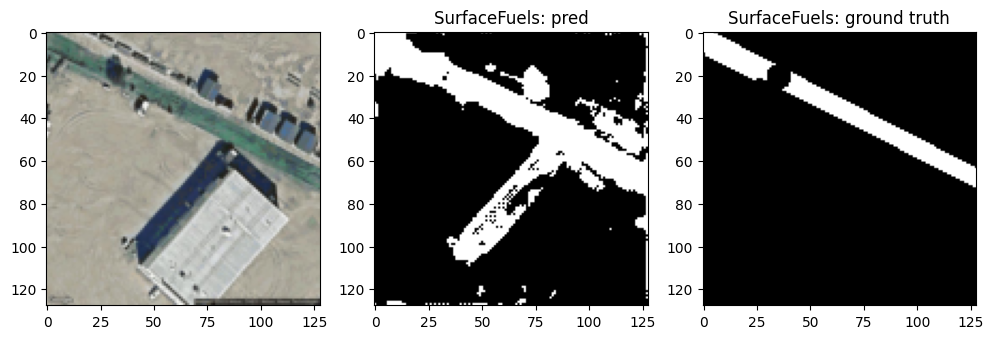

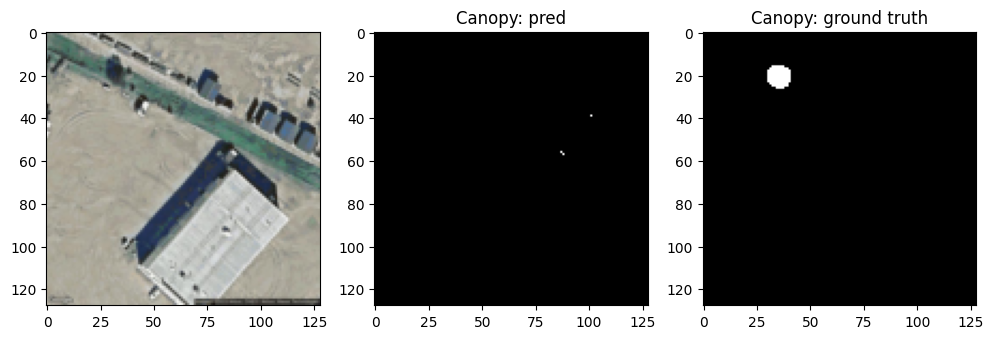

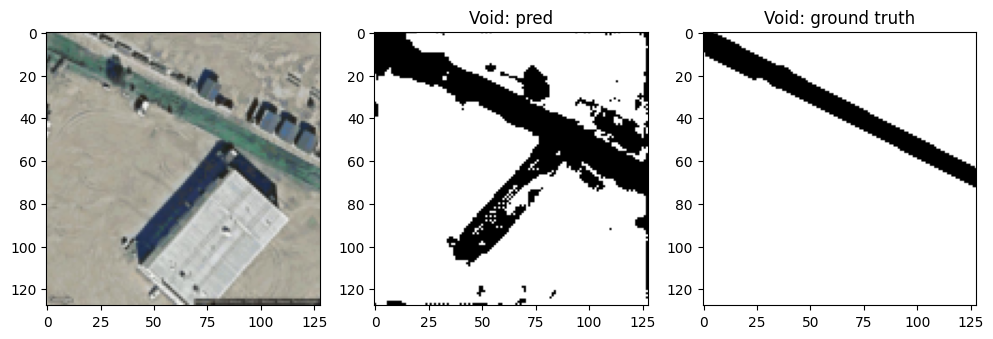

In [109]:
class_to_fuel = {i:cls for i, cls in enumerate(class_dict.keys())}
fuel_to_class = {cls:i for i, cls in enumerate(class_dict.keys())}

n = 20
for cls in range(3):
    fig, ax = plt.subplots(1,3, figsize=(12,18))
    ax[0].imshow(X_train[n,:,:,:])
    ax[1].imshow(new_y[n,:,:,cls], cmap="gray")
    ax[2].imshow(y_train[n,:,:,cls], cmap="gray")
    ax[1].set_title(f"{class_to_fuel[cls]}: pred")
    ax[2].set_title(f"{class_to_fuel[cls]}: ground truth")


In [ ]:
X_valid.sj

In [74]:
class_to_fuel

{0: 'SurfaceFuels', 1: 'Canopy', 2: 'Void'}

In [75]:
class_dict

{'SurfaceFuels': {'r': 0, 'g': 102, 'b': 0},
 'Canopy': {'r': 51, 'g': 51, 'b': 0},
 'Void': {'r': 0, 'g': 0, 'b': 0}}